# Por qué se debería usar Python en la investigación científica

Cada vez más científicos, profesores, ingenieros y técnicos de todo el mundo están usando Python como su lenguaje principal para plasmar y comprobar sus ideas, impartir clases, realizar  cálculos, desarrollar códigos, y simular prototipos relacionados con su trabajo o investigación.

De hecho ha habido durante décadas entre la comunidad científica un trasvase evidente entre el uso de lenguajes compilados y muy eficientes computacionalmente (como Fortran, C, C++, ...) a otros lenguajes interpretados (como Mathematica, MATLAB, Mapple, Maxima, Octave, Sage, ...), más amigables y flexibles, que permitían sobre todo ahorrar en tiempo humano dedicado al desarrollo y depuración del modelo, sobre todo si no había necesidad de enfrentarse a una simulación exhaustiva o muy exigente desde el punto de vista computacional. Y si finalmente esto resulta necesario, siempre se puede usar Python como "lenguaje pegamento" que permite unir y ensamblar varios módulos compilados y ejecutados de Fortran o C, junto con otros trozos de código y scripts confeccionados con Python, que permiten estructurar todo el código y realizar las tareas repetitivas de una manera mucho más cómoda y automatizada.

Pero no cabe duda que hoy en día el __entorno de programación de Python__, complementado con la cada vez más numerosa colección de excelentes __módulos adicionales__ y las numerosísimas contribuciones particulares de gente que realiza desarrollos para su propia investigación y que luego los pone a disposición de la comunidad científica, hace de este __ecosistema computacional__ uno __de los más extensos y fiables de los que se podría disponer. ¡Y todo esto a un coste cero!__ Y esta sería una de las razones fundamentales para su vertiginosa expansión y desarrollo entre la comunidad científica y universitaria internacional.

Otra de las muchas ventajas de este simple y limpio, pero evolucionado, lenguaje, es su carácter holístico y generalista. Evidentemente para ciertas operaciones habituales con matrices el lenguaje propio de MATLAB estará más adaptado que Python y para otras cuestiones o desarrollos teóricos Mathematica o Mapple serán algo menos complejos de usar que Python/IPython, ya que por defecto están más homogeneizados y no resulta necesario cargar tantos módulos concretos y distinguir de dónde provienen las órdenes o comandos que usemos. Pero sinceramente, vista la potencia y la gran variedad y versatilidad de los distintos módulos de Python disponibles y teniendo en cuenta el posible coste económico del software propietario equivalente, no cabe la menor duda: __¡Python es el futuro!__

Otra valoración comparativa habría que hacer entre todo el software libre disponible actualemtne para el cálculo y la investigación científica, pero ni por asomo ninguno de los posibles competidores (como Maxima y Octave por ejemplo) han llegado al grado de desarrollo, perfeccionamiento y ubicuidad al que ha llegado Python. Tal vez la única plataforma de software libre que le va a la par sería Sage, porque también incorpora la posiblidad de usar notebooks y permite conectar con una centena de paquetes de software libre (como Maxima, ATLAS, BLAS,  FLINT, GAP, etc.) incluidos la mayoría de módulos disponibles también para Python (como Cython, SymPy, NumPy, Matplotlib, etc.). Pero resulta ser una plataforma de software bastante más compleja que la de Python.

Por otra parte Python se adapta muy bien para el procesamiento y análisis de datos, tan en boga hoy en día, ya que estamos en la era del `Big Data` y tanto la producción científica actual como el mundo interconectado en el que vivimos genera una ingente cantidad de datos que hay que almacenar, procesar y analizar; y para todo esto Python va de maravilla. 

# Algunos ejemplos concretos de uso en investigación


## Tinción inmunohistoquímica mediante separación por colores


La deconvolución por color consiste en la separación de ciertas características (ya sean físico-químicas, fisiológicas, o del tipo que sea) a través de distingos colores.

En este ejemplo se separan las tinciones inmunohistoquímicas (IHC, siglas en inglés) a partir de la contratinción mediante hematoxilina. La separación es conseguida a partir de un método descrito y publicado en [1], y conocido como "deconvolución del color".

La expresión de tinción IHC de la proteina FHL2 se consigue revelar con Diaminobenzidina (DAB) que aporta un color marrón.


.. [1] A. C. Ruifrok and D. A. Johnston, "Quantification of histochemical
       staining by color deconvolution.," Analytical and quantitative
       cytology and histology / the International Academy of Cytology [and]
       American Society of Cytology, vol. 23, no. 4, pp. 291-9, Aug. 2001.
       
...[2] Notebook original en inglés [Immunohistochemical staining colors separation](http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_ihc_color_separation.html#sphx-glr-auto-examples-color-exposure-plot-ihc-color-separation-py)



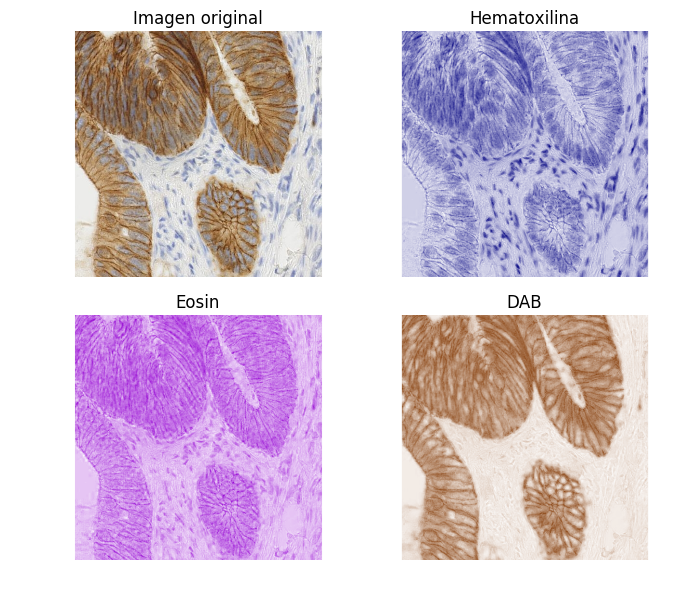

In [6]:
# Emplearemos gráficos de matplotlib en línea, incrustados en el Notebook
import matplotlib.pyplot as plt
%matplotlib inline    
# A continuación importaremos también  
from skimage import data            # ciertos datos 
from skimage.color import rgb2hed   # y escalas de color
from matplotlib.colors import LinearSegmentedColormap
##  incluidas en el módulo de procesamiento de imágenes 'skimage'


# Se crea ahora cierto color artificial lo más cercano al original
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white',
                                             'saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet',
                                               'white'])

ihc_rgb = data.immunohistochemistry()
ihc_hed = rgb2hed(ihc_rgb)

fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Imagen original")

ax[1].imshow(ihc_hed[:, :, 0], cmap=cmap_hema)
ax[1].set_title("Hematoxilina")

ax[2].imshow(ihc_hed[:, :, 1], cmap=cmap_eosin)
ax[2].set_title("Eosin")

ax[3].imshow(ihc_hed[:, :, 2], cmap=cmap_dab)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

A continuación se puede facilmente manipular por separado los "canales" provenientes de la hematoxilina y el DAB:

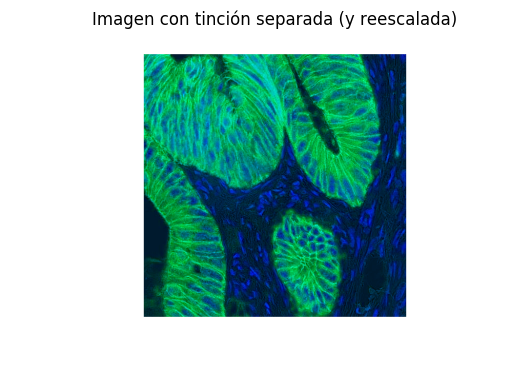

In [7]:
import numpy as np   #  Importación típica del módulo NumPy
from skimage.exposure import rescale_intensity  # Dentro del submódulo 'skimage.exposure'
# importamos otro submódulo para el reescalamiento de la intensidad

# Reescalamos ahora las señales provenientes de la hematoxilina y el DAB
# proporcionándoles una aspecto fluorescente
h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1))
d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1))
zdh = np.dstack((np.zeros_like(h), d, h))

fig = plt.figure()
axis = plt.subplot(1, 1, 1, sharex=ax[0], sharey=ax[0])
axis.imshow(zdh)
axis.set_title("Imagen con tinción separada (y reescalada)")
axis.axis('off')
plt.show()

# Otros ejemplos y herramientas del exitoso uso de Python en investigación científica

## AstroPy: herramientas para la comunidad astronómica [http://www.astropy.org/](http://www.astropy.org/)

## bcbio-nextgen: herramientas para la secuenciación genómica [https://pypi.org/project/bcbio-nextgen/0.4a/](https://pypi.org/project/bcbio-nextgen/0.4a/)

## Biopython: herramientas para computación biológica [https://biopython.org/](https://biopython.org/)

## NiPy: análsis de imágenes neurológicas [http://nipy.org/](http://nipy.org/)

## Open Babel:  herramienta creada para la unificación de información química [http://openbabel.org](http://openbabel.org)

## ObsPy: toolbox de Python para sismólogos [https://github.com/obspy](https://github.com/obspy)

## PyMC: módulo de Python para el modelado Bayesiano y el aprendizaje máquina probabilístico [https://docs.pymc.io/](https://docs.pymc.io/)

## QuTiP$^2$: plataforma de desarrollo para resolver la dinámica de un sistema cuántico [http://qutip.org/](http://qutip.org/)

## StatsModels: módulo de Python para la estimación y estudio de modelos estadísticos [https://www.statsmodels.org](https://www.statsmodels.org/stable/index.html)

## Spark: entorno unificado para el procesado de grandes cantidades de datos [http://spark.apache.org/](http://spark.apache.org/) 

## SimPy: herramienta de simulación de procesos discretos [https://simpy.readthedocs.io](https://simpy.readthedocs.io/en/latest/)

## SymPy: librería para cálculo simbólico [https://www.sympy.org](https://www.sympy.org/es/)

## Wavefunction: módulo para calcular la función de onda, niveles de energía, etc. de sistemas potenciales y qubits [https://github.com/jrjohansson/wavefunction](https://github.com/jrjohansson/wavefunction)

Se puede consultar una lista mucho más exhaustiva de módulos de Python, herramientas e interesantes Notebooks en el siguiente link: [https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks) 